In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


dataset_path = '/content/sample_data/yield_df.csv'
dataset = pd.read_csv(dataset_path)

In [ ]:
dataset_clean = dataset.dropna()

In [ ]:
#data info
print(dataset_clean.info())
#data description
print(dataset_clean.describe())
#data head
print(dataset_clean.head())
#data tail
print(dataset_clean.tail())
#data shape
print(dataset_clean.shape)
#data columns
print(dataset_clean.columns)
#data null values
print(dataset_clean.isnull().sum())
#data duplicates
print(dataset_clean.duplicated().sum())
#data unique values
print(dataset_clean.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB
None
         Unnamed: 0          Year    hg/ha_yield  \
count  28242.000000  28242.000000   28242.000000   
mean   14120.500000   2001.544296   77053.332094   
std     8152.907488      7.051905   84956.612897   
min        0.0000

In [ ]:

X = dataset_clean[['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Year']]
y = dataset_clean['hg/ha_yield']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

model = LinearRegression()

In [ ]:


model.fit(X_train, y_train)

LinearRegression()

In [ ]:

y_pred = model.predict(X_test)

In [ ]:

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [ ]:

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")


R-squared: 0.027962743215413366
Mean Squared Error: 7050839404.17514


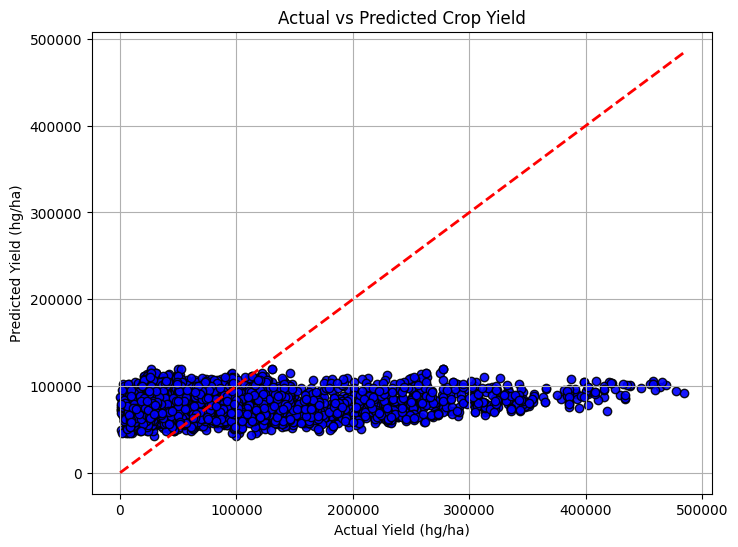

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.9)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Yield (hg/ha)')
plt.ylabel('Predicted Yield (hg/ha)')
plt.title('Actual vs Predicted Crop Yield')
plt.grid(True)
plt.show()

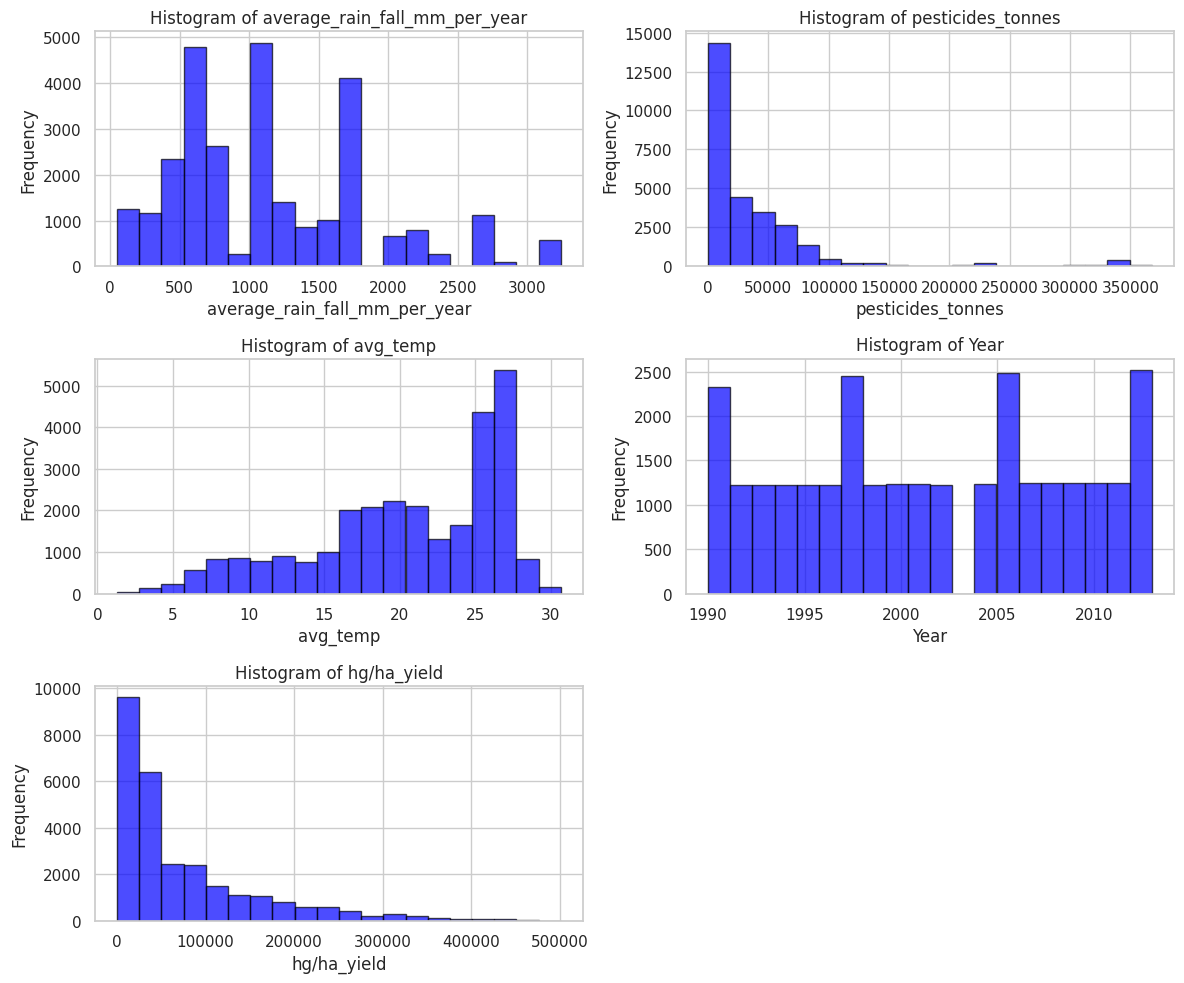

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Plotting histograms for each feature and target variable
features = ['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Year', 'hg/ha_yield']
plt.figure(figsize=(12, 10))  # Adjust the figure size

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)  # Create subplots
    plt.hist(dataset_clean[feature], bins=20, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

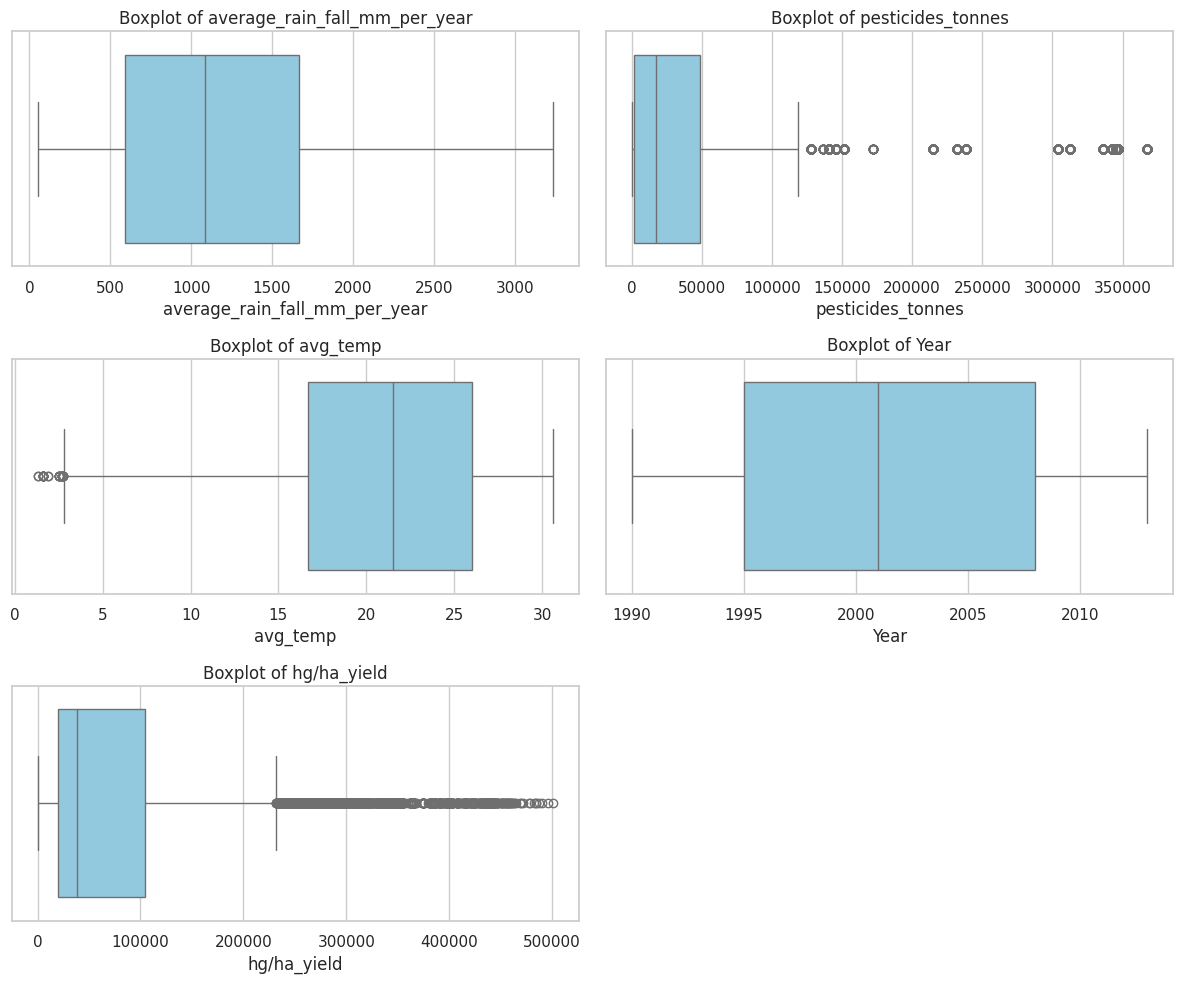

In [13]:
plt.figure(figsize=(12, 10))  # Adjust the figure size

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)  # Create subplots
    sns.boxplot(x=dataset_clean[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()